-------------------
# Tarea Numerica Ecuaciones Diferenciales Ordinarias (MA2601)
-------------------

> Integrantes:\
> $\rightarrow$ Iann Espinoza;  RUT: 21419586-0 \
> $\rightarrow$ Jorge Cummins;  RUT: 21353175-1\
> Seccion: 4 \
> Profesor de Catedra: Francisco Ortega C.\
> Fecha de Entrega: 02 de Junio de 2023 \


> ## Sobre el Documento


> ### Componentes: 
El presente documento es el solicitado en formato "*jupyter Notebook*" de la tarea numerica solicitada, en la cual se encontraran los cuadros de codigo que realizaran lo solicitad (y algunas anotaciones), cuadros de texto explicativos y algunos ejemplos si la situacion lo amerita. \
\
> Los cuadros de texto corresponeran ala informacion sobre el codigo que le prosigue siguiendo un formato de "*texto arriba, codigo abajo*", el cual intentara cumplir el objetivo de explicar el funcionamiento del codigo en el presente. Pese a esto tambien existiran anotaciones extras en formato "# *Anotaciones*" color "verde" en el/los codigos que deberia tener un formato similar al siguiente:
 \
 ```
1 # Anotacion 
2 Este es un codigo:              # Anotacion
3     sirve para ejemplificar     # Anotacion
4     el formato que se dijo      # Anotacion 
5                                 #
6 previamente                     # Anotacion
```
\
> Estos seran parte del codigo pero no tendran funcion ninguna mas que ser anotaciones insertadas por los desarrolladores para uso personal, aunque de ser necesario puede utilizarse como informacion sobre el documento/codigo. \
 \
> ### Orden:
>El documento esta separado en dos secciones aparte de la inicial: \
$\cdot)$ "*parte c)*": donde se contendra a la parte c) de la tarea. \
$\cdot)$ "*parte d)*": donde se contendra a la parte d) de la tarea. \
\
>Es importante informar que de ser necesario, se utilizaran codigos compartidos con el fin de mantener el orden y optimizar el proceso, el cual sera denotado por una anotacion al inicio del cuadro de codigo de forma "codigo compartido". Para poder utilizar el codigo donde este siendo reutilizado, sera necesario inicializar el original. Un caso sera la siguiente linea de codigos que permitira el acceso a librerias que podrian ser utilizadas.


In [2]:
# Codigo compartido
# Librerias Exportadas
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd


> ## Parte $c)$ "Otra forma para $h$"

> Dado al sistema de Ecuaciones Diferenciales (EDOs) utilizados en la parte $b)$ de la primera tarea numerica (es decir, tarea 1), el cual estaba dado por: 
> \begin{align*} \frac{dP}{dt} &= g(N)P-h(P)Z-MP \\ \frac{dZ}{dt} &= \gamma h(P)Z-KZ \\ \frac{dN}{dt} &= -g(N)P+(1-\gamma)h(P)Z+MP+KZ \end{align*} \
> Con $M$, $K$ y $\gamma$ valores constantes y, $g(N)$ $h(P)$ funciones definidas como sigue: 
>\begin{align*} g(N) &= \frac{V_{m}N }{k_{s}+N}\\ h(P) &= R_{m}P+\Lambda \end{align*} \
> Con $V_{m}$, $k_{s}$, $R_{m}$ y $\Lambda$, valores constantes definidos.
> Considerando las constantes y condiciones iniciales de la siguiente manera: 
> \begin{align*} &M = 0.1,\  K = 0.2,\  \gamma = 0.3 \\ &V_{M} = 5,\  k_{s} = 1  \\ &R_{m} = 3.5,\  \Lambda = 0.1 \\ &X(t=0) = (P(0),\ N(0),\ Z(0)) = (0.3,\ 0.1,\ 0.6) \end{align*} \
> Donde estos valores fueron implementados numericamente (es decir, programando) en el siguiente cuadro de codigo compartido durante la realizacion de esta parte en especifico de la tarea:

In [3]:
# Valores, constantes, funciones y/o parametros utilizados 
# Nombres                                                                         
# P: P                                                                            
# Z: Z                                                                           
# N: N

# Condiciones iniciales
P0 = 0.3                                                                         # -|      
Z0 = 0.1                                                                         #  |--->|Condiciones iniciales EDO
N0 = 0.6                                                                         # -|  
X0 = P0, Z0, N0                                                                  # Tupla de condiciones iniciales

# Constantes
M = 0.1                                                                          # -|
K = 0.2                                                                          #  |--->|Valores constantes del sistema de EDOs
gamma = 0.3                                                                      # -|

# ctes funcion g(N)
Vm = 5                                                                           # -|
k = 1                                                                            #  |--->|Constantes funcion g(N)
ctesg = Vm, k                                                                    # -|

# ctes h
Rm = 3.5                                                                         # -|
LAMBDA = 0.1                                                                     #  |--->|Constantes funcion h(p)
ctesh = Rm, LAMBDA                                                               # -|                  
                            
# Tupla ctes                                
ctes = M, K, gamma, Vm, k, Rm, LAMBDA                                            # Tupla que contiene a las constantes utilizadas (todas)   

# Tiempo                                                      
t = (0, 70)                                                                      # Intervalo de t en [0, 70]                                                                   

# configuraciones error asociado                                                 # Error asociado a la realizacion en RK45
# Conf1                                                                          # Configuracion de error 1 (configuracion 1; conf1) 
rtol1 = 10**(-3)                                                                 # -|--->|atol = rtol ~~~~> configuracion 1
atol1 = 10**(-3)                                                                 # -|
# Conf2                                                                          # Configuracion de error 2 (configuracion 2; conf2)
rtol2 =10**(-13)                                                                 # -|--->|atol = rtol ~~~~> configuracion 2
atol2 =10**(-13)                                                                 # -|  


> Teniendo en cuenta el enunciado, y con las constantes, funciones y condiciones iniciales ya planteadas, la realizacion a las preguntas propuestas quedarian como sigue:

> ### 1. Resolver numericamente el sistema para $t \in [0, 70]$ utilizando un solver, el metodo "*Runge-Kutta-45*" para dos configuraciones de error diferentes (las que llamaremos conf1 y conf2 respectivamente): 
> ### $\rightarrow$ conf1: 1atol = 1rtol = $10^{-3}$ 
> ### $\rightarrow$ conf2: 1atol = 1rtol = $10^{-13}$

> Para resolver numericamente el sistema, primero debemos definir las funciones precentes en el sistema "$g(N)$" y "$h(P)$". Teniendo en cuenta las constantes definidas en el cuadro de codigo inicial (no el encargado de importar librerias), tendriamos que las funciones estarian dadas por: 

In [4]:
# Funciones usadas 
# Funcion g(N)
def g(N,Vm,k):
    numerador = Vm*N                                                             # Planteamos el numerador de la funcion          
    denominador = k + N                                                          # Planteamos el denominador de la funcion
    g = numerador/denominador                                                    # En base a lo anterior, generamos el g
    return g  

# Funcion h(P)
def h(P ,Rm, LAMBDA):                                                            
    ashe = Rm*P                                                                  # Planteamos el producto entre variables 
    h = ashe + LAMBDA                                                            # Con el producto, planteamos el valor de "h" en base a la suma     
    return h
    

> Realizadas las funciones, queda definir la solucion al sistema como tal. Si bien su solucion se basara en la utilizacion de librerias externas (destacando "*Scipy*" en este proceso), debemos definir el lado derecho de la EDO del sistema. Para la realizacion de este ultimo, nos basaremos en la forma del sistema:

In [5]:
# Lado derecho de la EDO
# Definimos funcion lado derecho del sistema de EDOs
def Fderecho(t, X, ctes):                                                        # A diferencia de la primera tarea, es necesario expresar la variable independiente, en este caso "t"       
    P, Z, N = X                                                                  # Tula que contiene a las funciones a obtener   
    M, K, gamma, Vm, k, Rm, LAMBDA = ctes                                        # Descomposicion de tupla a valores constantes
    hashe = h(P, Rm, LAMBDA)                                                     # Generacion (o llamado) a funcion h(P)
    ge = g(N, Vm, k)                                                             # Generacion (o llamado) a funcion g(N)
    dP = ge*P-hashe*Z - M*P                                                      # -|
    dZ = gamma*hashe*Z - K*Z                                                     #  |--->|Definimos las soluciones a generar (parecido a forma del sistema es mera coincidencia)  
    dN = (-1)*ge*P + (1-gamma)*hashe*Z + M*P + K*Z                               # -| 
    Qx = np.array([dP, dZ, dN])                                                  # Realizacion lado derecho     
    return Qx


> Definido el lado derecho, falta el dar solucion al sistema. Para finalizar este proceso, definimos una variable en base a la funcion "*solve_ivp*" proveniente de la libreria Scipy. Esta funcion se encargaria de obtener la solucion en base a un metodo numerico como seria el "*Runge-Kutta-45*". Esta funcion, aplicandole (o simplemente ingresandoles los errores "*conf1*" y "*conf2*") arrojaria los siguientes resultados:



In [6]:
# Solucion EDO para diferentes casos

# Activador de funciones                                                         # -|
                                                                                 #  |
# Caso sin error                                                                 # -| 
#solucion1 = 'on'                                                                #  |
solucion1 = 'off'                                                                #  | 
                                                                                 #  |    |Sistema que se genero para activar y desactivar
# Caso con error asociado a configuracion 1                                      # -|--->|a gusto la realizacion de las diferentes formas  
solucion2 = 'on'                                                                 #  |    |del sistema dependiendo del error asociado
#solucion2 = 'off'                                                               #  |
                                                                                 #  |--->|Si esta el "#", significa que esa opcion esta
# Caso con error asociado a configuracion 2                                      # -|    |DESACTIVADA
solucion3 = 'on'                                                                 #
#solucion3 = 'off'                                                               #

# Solucion para error no definido
if solucion1 == 'on':                                                            # -|
  YhYp = solve_ivp(Fderecho, t, X0, method= "RK45",  args = (ctes,))             #  |    |Solucion para el caso sin error asociado, no fue solicitado  
  I, X = YhYp["t"], YhYp["y"]                                                    #  |--->|pero para entender el funcionamiento y, se decidio dejar postulada
  P, Z, N = X[0], X[1], X[2]                                                     # -|    |pero DESACTIVADA 

# Solucion para error configuracion 1
if solucion2 == 'on':                                                            # -|
  YhYp1 = solve_ivp(Fderecho, t, X0, method= "RK45",  args = (ctes,),            #  |    |Solucion para el caso con error asociado a conf1.
                    rtol = rtol1, atol = atol1)                                  #  |--->|Se encuentra ACTIVADA
  I1, X1 = YhYp1["t"], YhYp1["y"]                                                #  |    | 
  P1, Z1, N1 = X1[0], X1[1], X1[2]                                               # -|

# Solucion para error configuracion 2
if solucion3 == 'on':                                                            # -|
  YhYp2 = solve_ivp(Fderecho, t, X0, method= "RK45",  args = (ctes,),            #  |    |Solucion para el caso con error asociado a conf2
                    rtol = rtol2, atol = atol2)                                  #  |--->|Se encuentra ACTIVADA
  I2, X2 = YhYp2["t"], YhYp2["y"]                                                #  |    |
  P2, Z2, N2 = X2[0], X2[1], X2[2]                                               # -|   


> Finalmente, el bosquejo del grafico estaria dado por las siguientes funciones.

In [ ]:
# Grafico de soluciones en 2D (para P(t), Z(t), N(t) en un mismo bosquejo)

# Activar realizacion de grafico
#grafico1 = 'yes'                                                                 # Grafico 2D NO ERROR
grafico1 = 'no'

grafico2 = 'yes'                                                                 # Grafico 2D ERROR CONFIG 1
#grafico2 = 'no'

grafico3 = 'yes'                                                                 # Grafico 2D ERROR CONFIG 2
#grafico3 = 'no'


# Caso sin error asociado
if grafico1 == 'yes':                                                            # Caso sin error asociado, se encuentra DESACTIVADO
    plt.figure(figsize=(7,5))                                                    # Tamaño de la figura
    plt.plot(I, P, label = "P en funcion al tiempo (P(t))")                      # -|
    plt.plot(I, N, label = "N en funcion al tiempo (Z(t))")                      #  |--->|Realizacion Grafo
    plt.plot(I, Z, label = "Z en funcion al tiempo (N(t))")                      # -|
    plt.title("Comportamiento de P, N, Z con respecto al tiempo."
    " \n Caso sin error asociado")                                               # Titulo de la figura
    plt.xlabel("Tiempo (t)")                                                     # -|--->|Rotulo Ejes
    plt.ylabel("Variables: P(t), N(t), Z(t)")                                    # -|  
    plt.legend()                                                                 # Genera en pantalla los rotulos (titulos y rotulos) 
    plt.show()                                                                   # Genera la figura final 
print()
# Caso con error configuracion 1
if grafico2 == 'yes':                                                            # Caso con error = conf1, se encuentra ACTIVADA
    plt.figure(figsize=(7,5))                                                    # Tamaño de la figura
    plt.plot(I1, P1, label = "P en funcion al tiempo (P(t))")                    # -|
    plt.plot(I1, N1, label = "N en funcion al tiempo (Z(t))")                    #  |--->|Realizacion Grafo
    plt.plot(I1, Z1, label = "Z en funcion al tiempo (N(t))")                    # -|
    plt.title("Comportamiento de P, N, Z con respecto al tiempo."
    " \n Caso con error: $10^{-3}$")                                             # Titulo de la figura
    plt.xlabel("Tiempo (t)")                                                     # -|--->|Rotulo Ejes
    plt.ylabel("Variables: P(t), N(t), Z(t)")                                    # -|  
    plt.legend()                                                                 # Genera en pantalla los rotulos (titulos y rotulos) 
    plt.show()                                                                   # Genera la figura final 
print()
# Caso con error configuracion 2
if grafico3 == 'yes':                                                            # Caso con error = conf2, se encuentra ACTIVADA
    plt.figure(figsize=(7,5))                                                    # Tamaño de la figura
    plt.plot(I2, P2, label = "P en funcion al tiempo (P(t))")                    # -|
    plt.plot(I2, N2, label = "N en funcion al tiempo (N(t))")                    #  |--->|Realizacion Grafo
    plt.plot(I2, Z2, label = "Z en funcion al tiempo (Z(t))")                    # -|
    plt.title("Comportamiento de P, N, Z con respecto al tiempo."
    " \n Caso con error: $10^{-13}$")                                            # Titulo de la figura
    plt.xlabel("Tiempo (t)")                                                     # -|--->|Rotulo Ejes
    plt.ylabel("Variables: P(t), N(t), Z(t)")                                    # -|  
    plt.legend()                                                                 # Genera en pantalla los rotulos (titulos y rotulos) 
    plt.show()                                                                   # Genera la figura final 


> ### 2. Bosquejo de $(P, N, Z)$ en trs dimensiones (3D), dado a $P, Z, N$ obtenidos en la parte previa, para cada caso realizado.


> Para esta parte, se pide realizar un grafico de los valores de $(P, N, Z)$ realizados. Para esto, se baso en los graficos de plano de fase realizados en la parte $a)$ y $b)$ (no se omitio informacion, todo fue debidamente re-incorporado para esta situacion) para la realizacion de los graficos en tres dimensiones. Finalmente, estos quedarian de la siguiente forma:

In [ ]:
# Grafico 3D para los puntos de P(t), Z(t), N(t) a la vez (P, N, Z)              # ~~~~> grafico no dependiente del tiempo "de manera directa" (cualitativamente hablando)

# Activar realizacion de grafico
#grafico4 = 'yes'                                                                 # Grafico 3D NO ERROR
grafico4 = 'no'

grafico5 = 'yes'                                                                 # Grafico 3D ERROR CONFIG 1
#grafico5 = 'no'

grafico6 = 'yes'                                                                 # Grafico 3D ERROR CONFIG 2
#grafico6 = 'no'


# Caso sin error asociado
if grafico4 == 'yes':                                                            # Caso sin error asociado, se encuentra DESACTIVADO
    plt.figure(figsize=(7,5))                                                    # Tamaño de la figura
    ax = plt.axes(projection='3d')                                               # Generar grafico en 3D
    ax.plot(P, N, Z)                                                             # Valores a graficar   
    ax.set_title(' Grafico para (P, N, Z). \n  Caso sin error asociado ')        # Generar titulo de la grafica     
    ax.set_xlabel('P')                                                           # -|
    ax.set_ylabel('N')                                                           #  |--->|Rotular ejes
    ax.set_zlabel('Z')                                                           # -|  
    plt.show()                                                                   # Genera el grafico
print()
# Caso con error asociado configuracion 1
if grafico5 == 'yes':                                                            # Caso con error asociado a conf1, se encuentra ACTIVADA
    plt.figure(figsize=(7, 5))                                                    # Tamaño de la figura
    ax = plt.axes(projection='3d')                                               # Generar grafico en 3D
    ax.plot(P1, N1, Z1)                                                          # Valores a graficar   
    ax.set_title(' Grafico para (P, Z, N).'
    ' \n  Caso con error asociado: $10^{-3}$ ')                                  # Generar titulo de la grafica     
    ax.set_xlabel('P')                                                           # -|
    ax.set_ylabel('N')                                                           #  |--->|Rotular ejes
    ax.set_zlabel('Z')                                                           # -|  
    plt.show()       
print()
# Caso con error asociado a configuracion 2
if grafico6 == 'yes':                                                            # Caso con error asociado a conf2, se encuentra ACTIVADA
    plt.figure(figsize=(7,5))                                                    # Tamaño de la figura
    ax = plt.axes(projection='3d')                                               # Generar grafico en 3D
    ax.plot(P2, N2, Z2)                                                          # Valores a graficar   
    ax.set_title(' Grafico para (P, N, Z).'
    ' \n  Caso con error asociado: $10^{-13}$ ')                                 # Generar titulo de la grafica     
    ax.set_xlabel('P')                                                           # -|
    ax.set_ylabel('N')                                                           #  |--->|Rotular ejes
    ax.set_zlabel('Z')                                                           # -|  
    plt.show()     


> ### 3.

> ## Parte $d)$ "Inferencia del parametro del modelo simplificado"

> La parte final de la tarea, es decir, la parte $d)$, tambien conto con la presencia de un sistema de ecuaciones diferenciales (sistema de EDOs). En este caso dado por: 
> \begin{align*} \frac{dP}{dt} &= -PZ \\ \frac{dZ}{dt} &= \gamma PZ \\ \frac{dN}{dt} &= (1-\gamma)PZ\\  \end{align*} \
>
> Con $P_{0}$, $Z_{0}$, $N_{0}$ las condiciones iniciales. Sin embargo, en esta ocacion la unica constante presente, $\gamma$ seria desconocida, ademas de que se tendrian una coleccion de datos externa como referencia para el desarrolllo de esta parte. 
> Por ultimo, se agregaria un contexto al desarrollo, en la cual se intentaria modelar el comportamiento de tres poblaciones en un ecosistema, las cuales se les otorgaria una funcion respectiva: \
> $\rightarrow$P: Fitoplancton \
> $\rightarrow$Z: Zooplancton \
> $\rightarrow$N: Nutrientes en el ambiente \
>  
> De estas nuevas variables/funciones presentes, se tendria su comportamiento registrado en un documento .csv, el cual seria utilizado durante la realizacion.
> Finalmente, se tedria lo siguiente.

> ### 1.

> ### 2. Obtencion de la base de datos alojados en el repositorio.

> Inicialmente, se deberian extraer (u obtener) los datos mencionados previamente. Para esto se clono el repositorio utilizando las funciones dadas por el programa utilizado "*google colab*", el cual quedaria representado en el siguiente cuadro de codigos:

In [9]:
# Cuadro creado para, en base a una base de datos, extraer la informacion de este
!git clone https://github.com/diegoolguinw/MA2601TN2023.git


Cloning into 'MA2601TN2023'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 23 (delta 5), reused 22 (delta 4), pack-reused 0
Unpacking objects: 100% (23/23), 5.95 KiB | 276.00 KiB/s, done.


> Este ultimo solo permite acceder (o clonar) el documento para su utilizacion, por lo cual, si queriamos obtener o representar (entiendase como mostrar) los datos, realizamos las siguientes operaciones en el cuadro de codigos, los cuales permiten ubicar, leer el documento (el sistema) y finalmente mostrar los resultados:

In [24]:
# Obtener datos para utilizacion
path = "/content/MA2601TN2023/AtlanticoNorte.csv"                                # Localizar el archivo 
data = pd.read_csv(path)                                                         # Leer datos

# Mostrar datos del archivo importado
data.head                                                                        # Printear o mostrar los datos


<bound method NDFrame.head of            P         Z         N
0   0.713189  0.206493  0.144881
1   0.561768  0.258218  0.209565
2   0.430482  0.313622  0.306605
3   0.337355  0.390361  0.351789
4   0.220753  0.424513  0.398433
5   0.159331  0.472325  0.459729
6   0.089962  0.478597  0.516824
7   0.102407  0.478754  0.527600
8   0.056574  0.496342  0.519272
9   0.071715  0.479255  0.538065
10  0.049615  0.496271  0.546204
11  0.033343  0.519057  0.515466
12  0.036342  0.499872  0.561581
13  0.052080  0.495959  0.522483
14  0.045063  0.509437  0.556798
15  0.047632  0.496867  0.530847
16  0.034533  0.522284  0.525545
17  0.012012  0.506310  0.562888
18  0.024868  0.513602  0.528240
19  0.027101  0.488261  0.526116
20  0.013951  0.519934  0.567833>

> ### 3. Grafico de Zooplancton (Z) en funcion del Fitoplancton (P).

> Para comprobar la realizacion anterior y el desarrollo en la parte 1, se bosquejo la poblacion de zooplancton en funcion de aquella del Fitoplancton (P). En esta puede verse como la cantidad de este (Zooplancton, Z) disimuye conforme aumenta aquella del Fitoplancton (P), es decir, la tasa de descenso es mayor dado a que se tiene una funcion decreciente al tenerse una derivada negativa o menor que cero, pues se encuentra dada por: 
> \begin{align*} \frac{dZ}{dt} &= \gamma PZ \\ \frac{dZ}{dP} &= -\gamma & \text{(por parte 1.)}\end{align*} \
>
> Por ende, se tiene que tanto los resultados como el bosquejo de resultado concordarian entre si.
> El analisis se hizo en base al grafico resultado del siguiente cuadro de codigo:

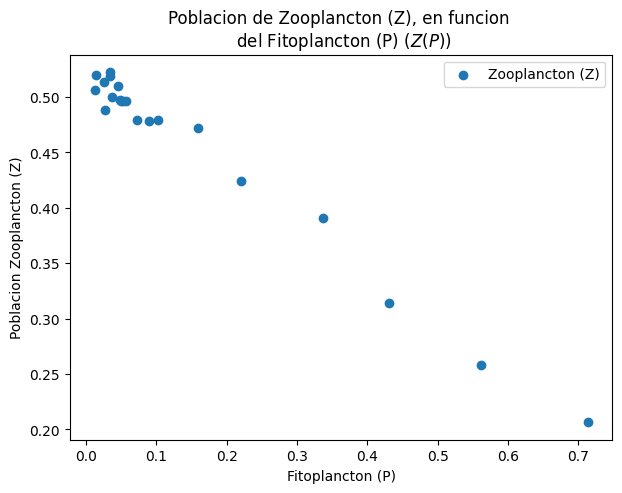

In [29]:
# Grafico de Z en funcion de P 
plt.figure(figsize=(7,5))                                                        # Tamaño de la imagen  
plt.scatter(P, Z, label = "Zooplancton (Z)")                                     #  |--->|Realizacion el Grafo
plt.title("Poblacion de Zooplancton (Z), en funcion \n del Fitoplancton"         # -|--->|Titulo       
          " (P) ($Z(P)$)")                                                       # -|      
plt.xlabel("Fitoplancton (P)")                                                   # -|--->|Rotulo de los Ejes
plt.ylabel("Poblacion Zooplancton (Z)")                                          # -| 
plt.legend()                                                                     # Generar titulo 
plt.show()                                                                       # Generar crafico 


> ### 4. Grafico de poblaciones de Fitoplancton (P), Zooplancton (Z) y Nutrientes (N) en funcion del tiempo.

> Con la informacion corroborada ya en la parte 3, se realizo un bosquejo en formato "*scatter*" de las poblaciones respectivas de Fitoplancton (P), Zooplancton (Z) y Nutrientes en el ambiente (N) (entiendase por poblacion en este caso a cantidad). Ademas, con el fin de tener un idea inicial del comportamiento, se agregaron unas graficas contiunas (extras) al grafico que sigue el formate "*scatter*" mencionado. Finalmente, la realizacion estaria dada por el siguiente cuadro de codigo

In [ ]:
# Grafico de valores extraidos
P, Z, N = data["P"], data["Z"], data["N"]                                        # Obtencion de valores para cada caso

# Grafico de P, Z, N en funcion al tiempo
plt.figure(figsize=(7,5))                                                        # Tamaño de la imagen     
plt.scatter(range(len(P)), P, label = "Fitoplancton en torno"                    # -|
            " al tiempo ($P(t)$)")                                               #  |  
plt.plot(range(len(P)), P)                                                       #  |
plt.scatter(range(len(Z)), Z, label = "Zooplancton en torno"                     #  |
            " al tiempo ($Z(t)$)")                                               #  |--->|Realizacion el Grafo
plt.plot(range(len(Z)), Z)                                                       #  |
plt.scatter(range(len(N)), N ,label = "Nutrientes en torno"                      #  | 
            " al tiempo ($N(t)$)")                                               #  |
plt.plot(range(len(N)), N)                                                       # -|  
plt.title("Poblacion del fitoplancton, zooplancton y"                            # -|--->|Titulo de la grafica 
           "nutrientes en el ambiente \n ($P(t)$ $Z(t)$ $N(t)$)")                # -|       
plt.xlabel("Tiempo")                                                             # -|--->|Rotulo de los Ejes
plt.ylabel("Poblacion muestra (para P, Z, N)")                                   # -| 
plt.legend()                                                                     # Generar titulo 
plt.show()                                                                       # Generar grafico 


> ### 5. Regresion lineal y obtencion del $\gamma$.

> Se tiene por enunciado que, de la informacion necesaria para realizar un analisis (es decir, los datos), la constante $\gamma$ no se encontraria con un valor conocido. Sin embargo, si un comportamiento de las poblaciones, lo cual dado al desarrollo de las partes 1 y 3, conoceriamos el comportamiento del $\gamma$, ademas de corroboral la concordancia de bosquejo y datos. \
>
> Con esto claro, para dar un valor respectivo al parametro $\gamma$, se realizo una aproximacion de este ultimo valor. Notando que la tasa de cambio de la poblacion del Zooplancton(Z) en funcion del Fitoplancton (P) estaria dado justamente por este valor, se decidio realizar una regresion lineal para obtener esta tasa y, por consiguiente, el valor del $\gamma$. \
>
> Para realizar esta regresion lineal, se tiene el siguiente cuadro de codigo en donde se uso la funcion de "*numpy*" "*polyfit*" o aproximacion de un polinomio de grado 1. Este quedaria de la forma:

In [32]:
# Regresion lineal
coeficientes = np.polyfit(P, Z, 1)                                               # Polyfit para realizar regresion
a = coeficientes[0] # Seria este el valor del gamma                              # Pendiente de la ecuacion 
b = coeficientes[1]                                                              # Traslacion de la ecuacion

# Resultados
Ecuacion = 'y='+str(a)+'x+'+str(b)                                               # Print o version "str()" de los resultados
#print("El coeficiente "'a'" o pendiente de la regresion estaria dado por :", a) # -|    |DESACTIVADO PARA MANTENER ORDEN 
#print("La traslacion o coeficiente "'b'" estaria dado por:", b)                 #  |--->|Print de resultados 
#print('Finalmente, la ecuacion seria y=ax+b => '+Ecuacion)                      # -|    |(mostrar resultados de regresion)


> Finalmente, conocido los valores, se realizo un bosquejo de ambos resultados, tanto de aquellos importados, como la recta de regresion lineal o, linea de tendencia ($\gamma$ seria la pendiente de la regresion en la figura). Esto mediante el siguiente cuadro de codigos que realizan la regresion y bosqueja:

In [ ]:
# Funcion o recta de regresion
def Regresion(a,b,x):                                                            # -|--->|Funcion formal en Python para definir 
  y = x*a+b                                                                      #  |    |la realizacion de la regresion para 
  return y                                                                       # -|    |el conjunto de datos

# Grafico de Z en funcion de P 
plt.figure(figsize=(7,5))                                                        # Tamaño de la imagen  
plt.scatter(P, Z, label = "Zooplancton (Z)", c = 'blue')                         # -|~~~~> Grafico valores
plt.plot(P, Regresion(a, b, P),                                                  #  |~~~~> Grafico regresion 
         label = 'Ecuacion regresion lineal ($x\in \{P\}$):'                     #  |
         ' \n'+Ecuacion, c = 'red')                                              #  |
plt.title("Poblacion de Zooplancton (Z), en funcion \n del Fitoplancton"         # -|--->|Titulo       
          " (P) ($Z(P)$)")                                                       # -|      
plt.xlabel("Fitoplancton (P)")                                                   # -|--->|Rotulo de los Ejes
plt.ylabel("Poblacion Zooplancton (Z)")                                          # -| 
plt.legend()                                                                     # Generar titulo 
plt.show()                                                                       # Generar grafico 


> ### 6. Resolver sistema de EDOs utilizando el metodo "*Runge-Kutta-45*" y los parametro obtenidos ($\gamma$).

> Para la parte final de la tarea, en base a los datos obtenidos en relacion al $\gamma$, un error asociado de $10^{-13}$ en terminos de "*rtol*" y "*atol*" y un intervalo de tiempo $t=[0,21]$ dias, se utilizo el metodo de "*Runge-Kutta-45*" en base al solver presente en las librerias importadas (especificamente, "*Scipy*"). Por ende, en base a lo desarrollado por los siguiente cuadro de codigos, se tuvo que:
> 
> $\rightarrow$ Cuadro de constantes definidas (o valores usados):

In [15]:
# Definimos constantes y parametros conocidos
# Nombres
# P: Fitoplancton
# Z: Zooplancton
# N: Nutrientes

# Condiciones iniciales
Pp0 = 0.7                                                                        # -|
Zz0 = 0.2                                                                        #  |--->|Se cambio el nombre para evitar 
Nn0 = 0.1                                                                        #  |    |problemas
Xx0 = Pp0, Zz0, Nn0                                                              # -|

# Ecuacion dada regresion lineal
Zreg = 'z='+str(a)+'•P+'+str(b)  
#print(Zreg)                                                                     # Ecuacion regresion lineal en caso   
                                                                                 # ser necesaria     
# Constantes
ktes = gamma                                                                     # Definir parametro para constantes

# Tiempo
t = (0, 21)                                                                      # Intervalo de realizacion (Dias)

# Error asociado (conf2)  
rtol3 =10**(-13)                   # atol = rtol = conf2 (error asociado)        # -|--->|Error asociado a la muestra
atol3 =10**(-13)                                                                 # -|


z=-0.4497941388232871•P+0.5223679038997382


> $\rightarrow$ Definir el lado derecho de la EDO o, vector lado derecho del sistema de EDOs:

In [16]:
# Lado derecho de la EDO
# Definimos funcion lado derecho del sistema de EDOs
def Zderecho(t, X, ctes):                                                        # A diferencia de la primera tarea, es necesario expresar la variable independiente, en este caso "t"       
    P, Z, N = X                                                                  # Tula que contiene a las funciones a obtener   
    gamma = ktes                                                                 # Definir valores constantes (no tupla)                                                      # Generacion (o llamado) a funcion g(N)
    dP = (-1)*P*Z                                                                # -|
    dZ = gamma*P*Z                                                               #  |--->|Definimos las soluciones a generar (parecido a forma del sistema es mera coincidencia)  
    dN = (1-gamma)*P*Z                                                           # -| 
    Qzx = np.array([dP, dZ, dN])                                                 # Realizacion lado derecho     
    return Qzx


> $\rightarrow$ Obtencion de resultados y bosquejo de estos en torno al tiempo:

In [ ]:
# Obtencion de resultados
ZhZp = solve_ivp(Zderecho, t, Xx0, method= "RK45",  args = (ktes,),
                 rtol = rtol3, atol=atol3)                                       #  |    |Solucion para el caso sin error asociado, no fue solicitado  
Ii, Xx = ZhZp["t"], ZhZp["y"]                                                    #  |--->|pero para entender el funcionamiento y, se decidio dejar postulada
Pp, Zz, Nn = Xx[0], Xx[1], Xx[2]   

# Realizacion del grafico                                                       
plt.figure(figsize=(7,5))                                                        # Tamaño de la figura
plt.plot(Ii, Pp, label = "Poblacion fitoplancton(P(t))")                         # -|
plt.plot(Ii, Zz, label = "Poblacion zooplancton (Z(t))")                          #  |--->|Realizacion Grafo
plt.plot(Ii, Nn, label = "Poblacion nutrientes (Z(t))")                         # -|
plt.title("Comportamiento de la poblacion del fitoplancton, nutrientes y "
"zooplancton en funcion del tiempo. \n Error asociado: $10^{-13}$")              # Titulo de la figura
plt.xlabel("Tiempo (t)")                                                         # -|--->|Rotulo Ejes
plt.ylabel("Poblacion en funcion del tiempo")                                    # -|  
plt.legend()                                                                     # Genera en pantalla los rotulos (titulos y rotulos) 
plt.show()                                                                       # Generar grafico 

# Realizacion del grafico de dos curvas (o valores)                                                       
plt.figure(figsize=(7,5))                                                        # Tamaño de la figura
plt.plot(Ii, Pp, label = "Poblacion fitoplancton(P(t))")                         # -|
plt.plot(Ii, Zz, label = "Poblacion zooplancton (Z(t))")                         #  |--->|Realizacion Grafo metodo
plt.plot(Ii, Nn, label = "Poblacion nutrientes (N(t))")                          # -|
plt.scatter(range(len(P)), P, label = "Fitoplancton en torno"                    # -|
            " al tiempo ($P(t)$)")                                               #  |
plt.scatter(range(len(Z)), Z, label = "Zooplancton en torno"                     #  |--->|Realizacion Grafo valores originales
            " al tiempo ($Z(t)$)")                                               #  | 
plt.scatter(range(len(N)), N ,label = "Nutrientes en torno"                      #  | 
            " al tiempo ($N(t)$)")                                               # -|
plt.title("Comportamiento de la poblacion del fitoplancton, nutrientes y "       # -|
"zooplancton en funcion del tiempo. \n Error asociado: $10^{-13}$")              # -|--->|Titulo de la figura
plt.xlabel("Tiempo (t)")                                                         # -|--->|Rotulo Ejes
plt.ylabel("Poblacion en funcion del tiempo")                                    # -|  
plt.legend()                                                                     # Genera en pantalla los rotulos (titulos y rotulos) 
plt.show()                                                                       # Generar grafico 





> Finalmente, podemos notar una correlacion entre los graficos generados, pues para las mismas variables, suele seguir una tendencia o mejor dicho, "*forma*" final similar entre curvas de las variables. \
>
> Es importante notar el parecido en forma pero, la diferencia en suavidad. Notando que en el primer caso se considera un "*ruido*" en los parametros, ademas de considerarse el caso especifico para cada valor obtenido, se tiene entonces una grafica considerablemente menos suave que el caso obtenido con el metodo, la cual realiza los bosquejos dado parametros calculados que se asemejen a los valores entregados. 
>
> Finalmente, y pese a la suavidad diferida entre curvas, se concluye que existe una correlacion por lo menos en forma del grafico, y por ende, en "*aporximar*" los valores mediante el metodo numerico utilizado, ademas de ser necesario nombrar la obtencion del $\gamma$ en la parte 5 que, permite realizar una aproximacin decente mediante el metodo numerico.